In [1]:
import os
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LdaModel
from gensim.parsing.preprocessing import preprocess_string

In [2]:
# Load each CSV file into a dataframe
df1 = pd.read_csv('articles1.csv')
df2 = pd.read_csv('articles2.csv')
df3 = pd.read_csv('articles3.csv')

# Concatenate dataframes into one
df = pd.concat([df1, df2, df3], ignore_index=True)


In [3]:
# Sample 60% of the data for practice run
sampled_df = df.sample(frac=0.2, random_state=42)
sampled_df.reset_index(drop=True, inplace=True)

In [4]:
# preprocess the content column
sampled_df['processed_content'] = sampled_df['content'].apply(preprocess_string)


In [5]:
# Dictionary for assigning numerical ids to each words
dictionary = corpora.Dictionary(sampled_df['processed_content'])

# doc2bow to create bag of words representation
corpus = [dictionary.doc2bow(text) for text in sampled_df['processed_content']]


In [6]:
# Train the LDA model
lda_model = LdaModel(corpus, id2word=dictionary, num_topics=20, passes=15)

# Print the topics
for ids, topic in lda_model.print_topics(-1):
    words = [word.split('"')[1] for word in topic.split(' + ')]
    print(f"Topic{ids + 1}: {', '.join(words)}")


Topic1: music, song, googl, compani, appl, technolog, internet, user, app, data
Topic2: it’, like, peopl, think, don’t, know, wai, thing, time, want
Topic3: presid, republican, state, immigr, hous, law, senat, american, govern, plan
Topic4: new, twitter, media, report, breitbart, post, facebook, follow, tweet, fox
Topic5: health, drug, medic, said, sai, research, peopl, studi, patient, care
Topic6: game, team, player, plai, said, season, sport, win, footbal, year
Topic7: trump, republican, cruz, said, gop, rubio, conserv, senat, sai, ryan
Topic8: said, percent, compani, year, million, market, billion, new, tax, busi
Topic9: said, investig, russian, report, intellig, russia, email, offici, inform, fbi
Topic10: trump, clinton, elect, campaign, democrat, vote, voter, hillari, republican, candid
Topic11: climat, said, year, flight, sea, scientist, air, plane, chang, new
Topic12: women, school, student, educ, univers, children, colleg, sexual, men, said
Topic13: trump, said, presid, trump’,

In [7]:
topic_word_dist = lda_model.print_topics(num_topics = 20, num_words=10)
with open('topic_word_distributions.txt', 'w') as file:
    for topic, words in topic_word_dist:
        file.write(f"Topic {topic}: {words}\n")

In [8]:
document_topic_dist = lda_model.get_document_topics(corpus, per_word_topics=True)
with open('document_topic_distributions.txt', 'w') as file:
    for i, doc in enumerate(document_topic_dist):
        file.write(f"Document {i}: {doc}\n")

In [9]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Visualize the topics
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)


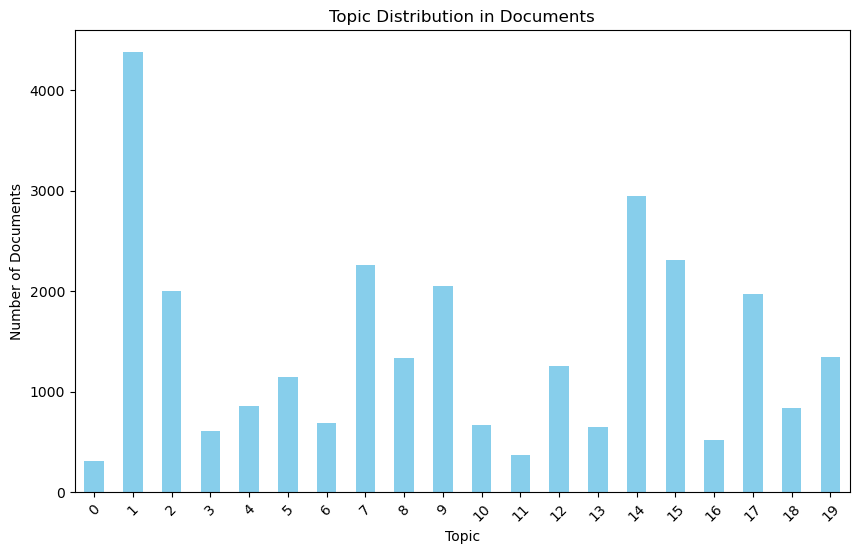

In [10]:
import matplotlib.pyplot as plt

# topic distribution for each document
document_topics = [lda_model.get_document_topics(doc) for doc in corpus]
dominant_topics = [max(topics, key=lambda x: x[1])[0] for topics in document_topics]
topic_counts = pd.Series(dominant_topics).value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
topic_counts.sort_index().plot(kind='bar', color='skyblue')
plt.title('Topic Distribution in Documents')
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.xticks(rotation=45)
plt.show()
